In [1]:
#load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in our data
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
#calculate price; true population mean
airbnb["price"].mean()

249.16526273565984

In [4]:
np.random.seed(100)
airbnb.sample(n=40)["price"].mean()

222.875

In [15]:
#without random seed
airbnb.sample(n=40)["price"].mean()

303.525

In [16]:
np.random.seed(100)
sample_list = []
for i in range(20_000):
    sample = airbnb.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)
samples = pd.concat(sample_list)


In [17]:
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
3845,8.150000e+17,Oakridge,Entire home/apt,4,1.0,1.0,1.0,300,0
2182,4.562610e+07,Downtown,Entire home/apt,5,1.0,2.0,3.0,170,0
1543,3.427885e+07,Renfrew-Collingwood,Entire home/apt,6,2.0,3.0,3.0,140,0
211,4.418911e+06,Kitsilano,Entire home/apt,2,NaN,1.0,NaN,66,0
2511,5.118911e+07,Downtown,Entire home/apt,4,1.0,1.0,3.0,190,0
...,...,...,...,...,...,...,...,...,...
2922,6.000000e+17,Downtown,Entire home/apt,3,1.0,1.0,2.0,214,19999
1155,2.630640e+07,Marpole,Entire home/apt,2,1.0,0.0,0.0,125,19999
1988,4.172329e+07,Downtown,Entire home/apt,2,1.0,1.0,2.0,160,19999
2153,4.479293e+07,Riley Park,Entire home/apt,2,1.0,1.0,1.0,169,19999


In [20]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")

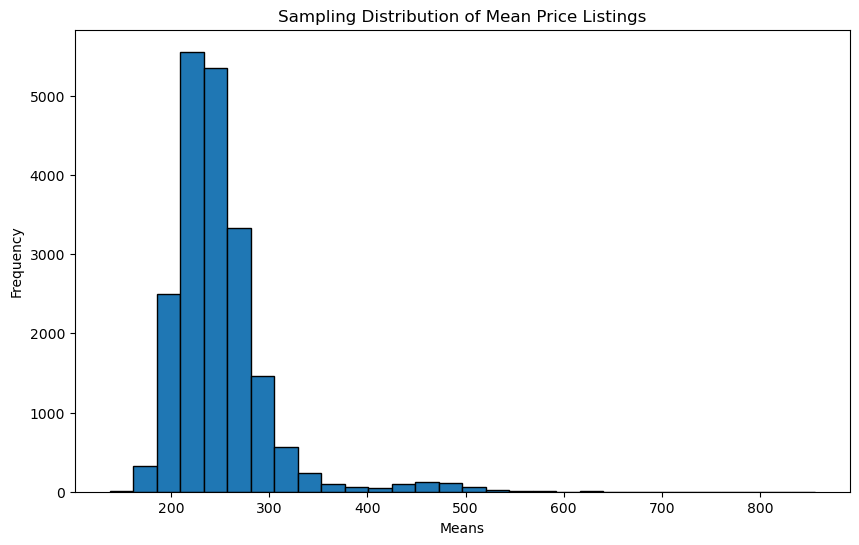

In [21]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [37]:
np.random.seed(1234)
one_sample = airbnb.sample(n=400)
one_sample['price'].mean()

242.03

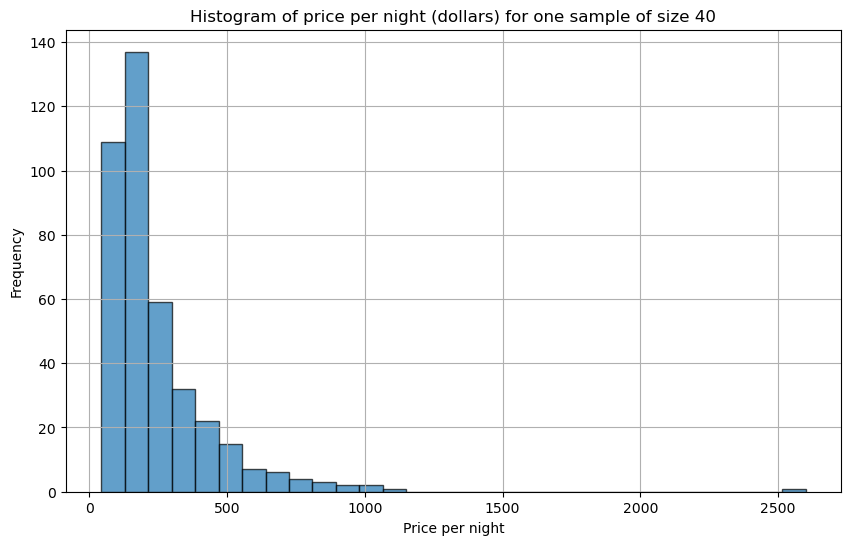

In [38]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


In [39]:
boot1 = one_sample.sample(frac=1, replace = True)

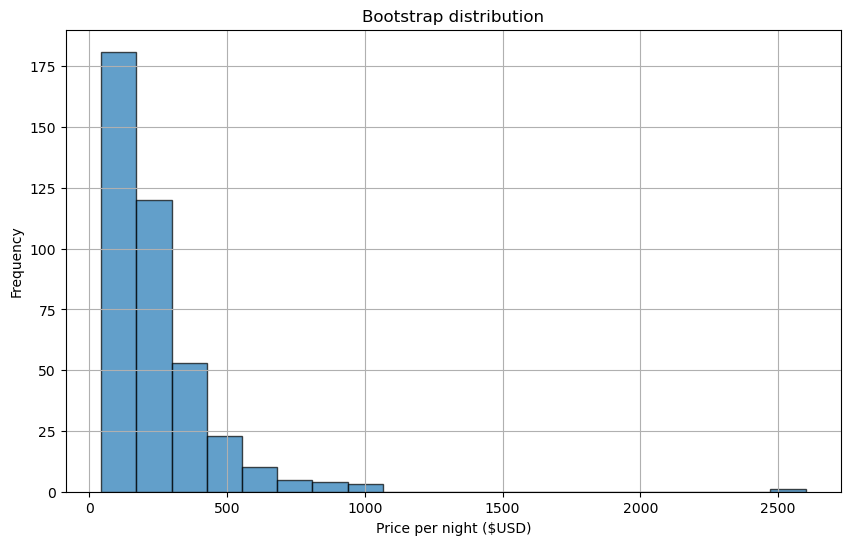

In [40]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [41]:
bootstrap_samples = []
for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace = True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)
boot2000 = pd.concat(bootstrap_samples)  

In [42]:
boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name ="mean_price")

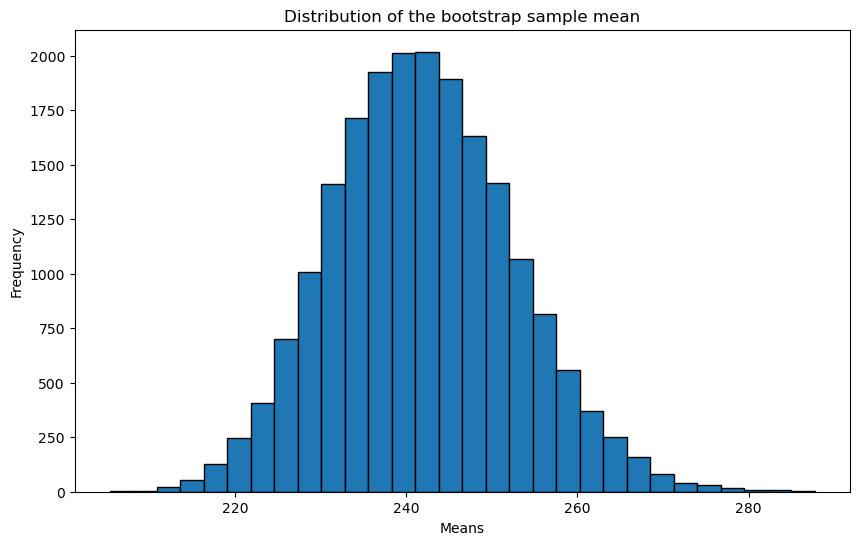

In [43]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means["mean_price"], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [44]:
#compute confidence intervals
ci_bounds = boot_means["mean_price"].quantile([0.025,0.975])
ci_bounds

0.025    222.174875
0.975    263.990437
Name: mean_price, dtype: float64